# Factorial designs: principles and applications

## Understanding marketing campaign effectiveness
Imagine you're a digital marketer analyzing data from a recent campaign to understand what messaging style and time of day yield the highest conversions. This analysis is crucial for guiding future marketing strategies, ensuring that your messages reach potential customers when they're most likely to engage. In this exercise, you're working with a d# ataset giving the outcomes of different messaging styles ('Casual' versus 'Formal') and times of day ('Morning' versus 'Evening') on conversion rates, a common scenario in marketing data analysis.

The data has been loaded for you as a DataFrame named marketing_data, and pandas is loaded as pd.


* Create a pivot table with 'Messaging_Style' as the index and 'Time_of_Day' as the columns, computing the mean of Conversions.
* Print this pivot table.

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic marketing campaign data
n_observations = 400

# Generate data for different messaging styles and times of day
data = []

for messaging_style in ['Casual', 'Formal']:
    for time_of_day in ['Morning', 'Evening']:
        # Different conversion rates based on combination
        if messaging_style == 'Casual' and time_of_day == 'Evening':
            base_conversion = 0.25  # Highest conversion
        elif messaging_style == 'Casual' and time_of_day == 'Morning':
            base_conversion = 0.18
        elif messaging_style == 'Formal' and time_of_day == 'Evening':
            base_conversion = 0.15
        else:  # Formal + Morning
            base_conversion = 0.12  # Lowest conversion
        
        # Create 100 observations for each combination
        for i in range(100):
            # Add some random variation
            conversion = np.random.binomial(1, base_conversion + np.random.uniform(-0.03, 0.03))
            impressions = np.random.randint(80, 150)
            clicks = int(impressions * (base_conversion + np.random.uniform(-0.02, 0.02)))
            
            data.append({
                'Campaign_ID': len(data) + 1,
                'Messaging_Style': messaging_style,
                'Time_of_Day': time_of_day,
                'Impressions': impressions,
                'Clicks': clicks,
                'Conversions': conversion
            })

# Create DataFrame
marketing_data = pd.DataFrame(data)

# Display dataset information
print("Marketing Campaign Dataset Overview:")
print(f"Total observations: {len(marketing_data)}")
print(f"Messaging style distribution:")
print(marketing_data['Messaging_Style'].value_counts())
print(f"Time of day distribution:")
print(marketing_data['Time_of_Day'].value_counts())

print("\nFirst 10 rows of the dataset:")
print(marketing_data.head(10))

print("\nConversion rates by messaging style:")
print(marketing_data.groupby('Messaging_Style')['Conversions'].mean())

print("\nConversion rates by time of day:")
print(marketing_data.groupby('Time_of_Day')['Conversions'].mean())

# Save to CSV for later use
marketing_data.to_csv('marketing_campaign_data.csv', index=False)
print("\nDataset saved as 'marketing_campaign_data.csv'")

Marketing Campaign Dataset Overview:
Total observations: 400
Messaging style distribution:
Messaging_Style
Casual    200
Formal    200
Name: count, dtype: int64
Time of day distribution:
Time_of_Day
Morning    200
Evening    200
Name: count, dtype: int64

First 10 rows of the dataset:
   Campaign_ID Messaging_Style Time_of_Day  Impressions  Clicks  Conversions
0            1          Casual     Morning          140      25            1
1            2          Casual     Morning          103      19            0
2            3          Casual     Morning          109      18            0
3            4          Casual     Morning          137      24            0
4            5          Casual     Morning          138      24            0
5            6          Casual     Morning           94      16            1
6            7          Casual     Morning          134      26            0
7            8          Casual     Morning           86      14            1
8            9       

In [2]:
# Create a pivot table for marketing campaign data
marketing_pivot = marketing_data.pivot_table(
  values='Conversions', 
  index='Messaging_Style', 
  columns='Time_of_Day', 
  aggfunc='mean')

# View the pivoted results
print(marketing_pivot)

Time_of_Day      Evening  Morning
Messaging_Style                  
Casual              0.21     0.17
Formal              0.14     0.15


Notice that the mean conversion is highest for the 'Formal' messaging style in the 'Evening' time of day.

##  Heatmap of campaign interactions
Visualizing data can often reveal patterns that are not immediately obvious. In the context of marketing, understanding how different factors interact and affect the success of a campaign is vital. By creating a heatmap of conversions based on messaging style and time of day, you can quickly identify which combinations perform best and which ones need reevaluation. This visual tool is invaluable for marketing teams looking to optimize their strategies for maximum impact.

The data from the previous exercise has been loaded for you as marketing_pivot, seaborn is loaded as sns, and matplotlib.pyplot as plt.


* Visualize interactions between Messaging_Style and Time_of_Day with respect to conversions by creating an annotated cool-warm heatmap of marketing_pivot.m

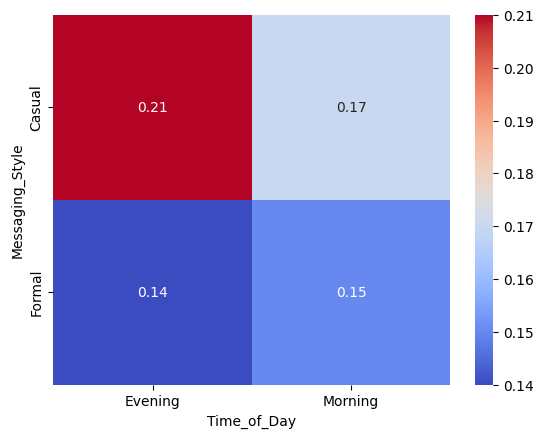

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize interactions with a heatmap
sns.heatmap(marketing_pivot, 
         annot=True, 
         cmap='coolwarm',
         fmt='g')

plt.show()

# Randomized block design: controlling variance

## Implementing a randomized block design
The manufacturing firm you worked with earlier is still interested in conducting some experiments on worker productivity. Previously, the two blocks were set randomly. While this can work, it can be better to group subjects based on similar characteristics.

The same employees are again loaded but this time in a DataFrame called productivity including 1200 other colleagues. It also includes a worker 'productivity_score' column based on units produced per hour. This column was binned into three groups to generate blocks based on similar productivity values. The firm would like to apply a new incentive program with three options ('Bonus', 'Profit Sharing' and 'Work from Home') throughout the firm with treatment applied randomly.


* Shuffle the blocks to create a new DataFrame called prod_df.
* Reset the index so that block is not both an index and a column.
* Randomly assign the three treatment values in the 'Treatment' column.

In [9]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic worker productivity data for 1200 employees
n_workers = 1200

# Generate productivity scores (units produced per hour)
# Simulating a normal distribution with some variation
productivity_scores = np.random.normal(50, 15, n_workers)
# Ensure scores are positive and within reasonable range
productivity_scores = np.clip(productivity_scores, 10, 100)

# Bin productivity scores into three groups for blocking
bins = [0, 40, 60, 100]  # Low, Medium, High productivity
labels = ['Low', 'Medium', 'High']
productivity_bins = pd.cut(productivity_scores, bins=bins, labels=labels)

# Generate additional worker characteristics
departments = np.random.choice(['Production', 'Assembly', 'Quality Control', 'Packaging', 'Shipping'], n_workers)
experience_years = np.random.randint(1, 25, n_workers)
shifts = np.random.choice(['Day', 'Night', 'Swing'], n_workers)

# Create DataFrame
productivity = pd.DataFrame({
    'worker_id': range(1, n_workers + 1),
    'productivity_score': productivity_scores,
    'productivity_block': productivity_bins,
    'department': departments,
    'experience_years': experience_years,
    'shift': shifts
})

# Display dataset information
print("Worker Productivity Dataset Overview:")
print(f"Total workers: {len(productivity)}")
print(f"Productivity block distribution:")
print(productivity['productivity_block'].value_counts())
print(f"Department distribution:")
print(productivity['department'].value_counts())
print(f"Shift distribution:")
print(productivity['shift'].value_counts())

print("\nFirst 10 rows of the dataset:")
print(productivity.head(10))

print("\nProductivity statistics by block:")
print(productivity.groupby('productivity_block')['productivity_score'].describe())

# Save to CSV for later use
productivity.to_csv('worker_productivity_data.csv', index=False)
print("\nDataset saved as 'worker_productivity_data.csv'")

# Create the shuffled version for the experiment
prod_df = productivity.sample(frac=1, random_state=42).reset_index(drop=True)

# Randomly assign treatments within each block
treatments = ['Bonus', 'Profit Sharing', 'Work from Home']

# Assign treatments randomly but balanced within each block
prod_df['Treatment'] = prod_df.groupby('productivity_block')['productivity_score']\
    .transform(lambda x: np.random.choice(treatments, len(x), replace=True))

print("\nAfter treatment assignment:")
print(prod_df.head(10))
print(f"\nTreatment distribution by block:")
print(prod_df.groupby(['productivity_block', 'Treatment']).size().unstack(fill_value=0))

Worker Productivity Dataset Overview:
Total workers: 1200
Productivity block distribution:
productivity_block
Medium    614
High      302
Low       284
Name: count, dtype: int64
Department distribution:
department
Packaging          266
Shipping           249
Production         235
Quality Control    229
Assembly           221
Name: count, dtype: int64
Shift distribution:
shift
Swing    418
Night    408
Day      374
Name: count, dtype: int64

First 10 rows of the dataset:
   worker_id  productivity_score productivity_block       department  \
0          1           57.450712             Medium         Shipping   
1          2           47.926035             Medium         Assembly   
2          3           59.715328             Medium  Quality Control   
3          4           72.845448               High         Shipping   
4          5           46.487699             Medium         Shipping   
5          6           46.487946             Medium        Packaging   
6          7       

/tmp/ipykernel_36/137177930.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(productivity.groupby('productivity_block')['productivity_score'].describe())
/tmp/ipykernel_36/137177930.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prod_df['Treatment'] = prod_df.groupby('productivity_block')['productivity_score']\
/tmp/ipykernel_36/137177930.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(prod_df.

## Visualizing productivity within blocks by incentive
Continuing with the worker productivity example, you'll explore if the productivity scores are distributed throughout the data as one would expect with random assignment of treatment. Note that this is a precautionary step, and the treatment and follow-up results on the impact of the three treatments is not done yet!


* Visualize the productivity scores within blocks by treatment using a boxplot with 'block' for x, 'productivity_score' for y, and 'Treatment' for hue.



In [12]:
# Make a plot showing how positivity_score varies within blocks
sns.boxplot(x='block', 
            y='productivity_score', 
            hue='Treatment', 
            data=prod_df)

plt.show()

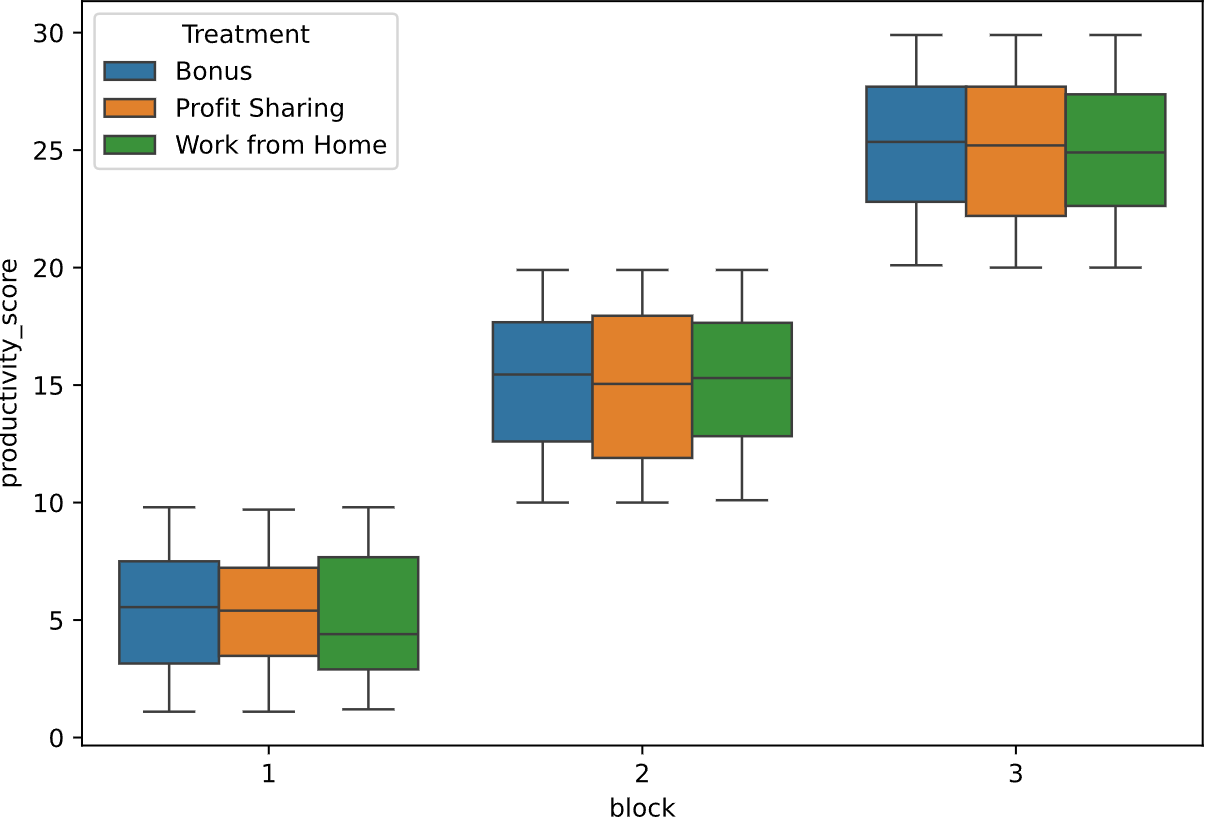

You've successfully created a visualization that illustrates how the 'productivity_score' varies within different blocks, with the additional layer of treatment differentiation. Notice that the 'productivity_score' values vary greatly across blocks—that's how you set up the blocks to start! You, therefore, won't test for variability across blocks, but will you see significant variability within blocks? Time to find out!

# ANOVA within blocks of employees
Building on your previous analyses with the manufacturing firm, where worker productivity was examined across different blocks and an incentive program was introduced, you're now delving deeper into the data. The firm, equipped with a more comprehensive dataset in the productivity DataFrame, including 1200 additional employees and their productivity_score, has structured the workforce into three blocks based on productivity levels. Each employee has been randomly assigned one of three incentive options: 'Bonus', 'Profit Sharing', or 'Work from Home'.

Before assessing the full impact of these incentive treatments on productivity, it's crucial to verify that the initial treatment assignment was indeed random and equitable across the different productivity blocks. This step ensures that any observed differences in productivity post-treatment can be confidently attributed to the incentive programs themselves, rather than pre-existing disparities in the blocks.

The f_oneway() function from scipy.stats has been loaded for you.


* Group prod_df by the appropriate column that represents different blocks in your data.
* Use a lambda function to apply the ANOVA test within each block, specifying the lambda function's argument.
* For each treatment group within the blocks, filter prod_df based on the 'Treatment' column values and select the 'productivity_score' column.

In [14]:
# Perform the within blocks ANOVA, first grouping by block
within_block_anova = prod_df.groupby('block').apply(
  lambda x: f_oneway(
    x[x['Treatment'] == 'Bonus']['productivity_score'], 
    x[x['Treatment'] == 'Profit Sharing']['productivity_score'],
    x[x['Treatment'] == 'Work from Home']['productivity_score'])
)

print(within_block_anova)

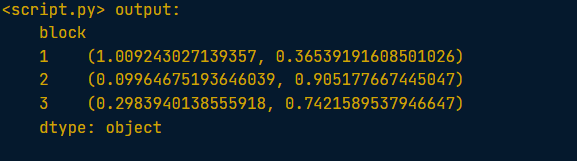

# Covariate adjustment with chick growth
Imagine studying in agricultural science the growth patterns of chicks under various dietary regimens. The data from this study sheds light on the intricate relationship between their respective diets and the consequent impact on their weight. This data includes weight measurements of chicks at different ages, allowing for an exploration of covariate adjustment. age serves as a covariate, potentially influencing the outcome variable: the weight of the chicks.

DataFrames exp_chick_data, the experimental data, and cov_chick_data, the covariate data, have been loaded, along with the following libraries:



* Join the experimental and covariate data based on common column(s), and print this merged data.
* Produce an ANCOVA predicting 'weight' based on 'Diet' and 'Time'.
* Print a summary of the ANCOVA model.
* Design an lmplot to see hue='Diet' effects on y='weight' adjusted for x='Time'.

In [15]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Join experimental and covariate data
merged_chick_data = pd.merge(exp_chick_data, 
                             cov_chick_data, on='Chick')

# Perform ANCOVA with Diet and Time as predictors
model = ols('weight ~ Diet + Time', data=merged_chick_data).fit()

# Print a summary of the model
print(model.summary())

# Visualize Diet effects with Time adjustment
sns.lmplot(x='Time', y='weight', 
         hue='Diet', 
         data=merged_chick_data)
plt.show()

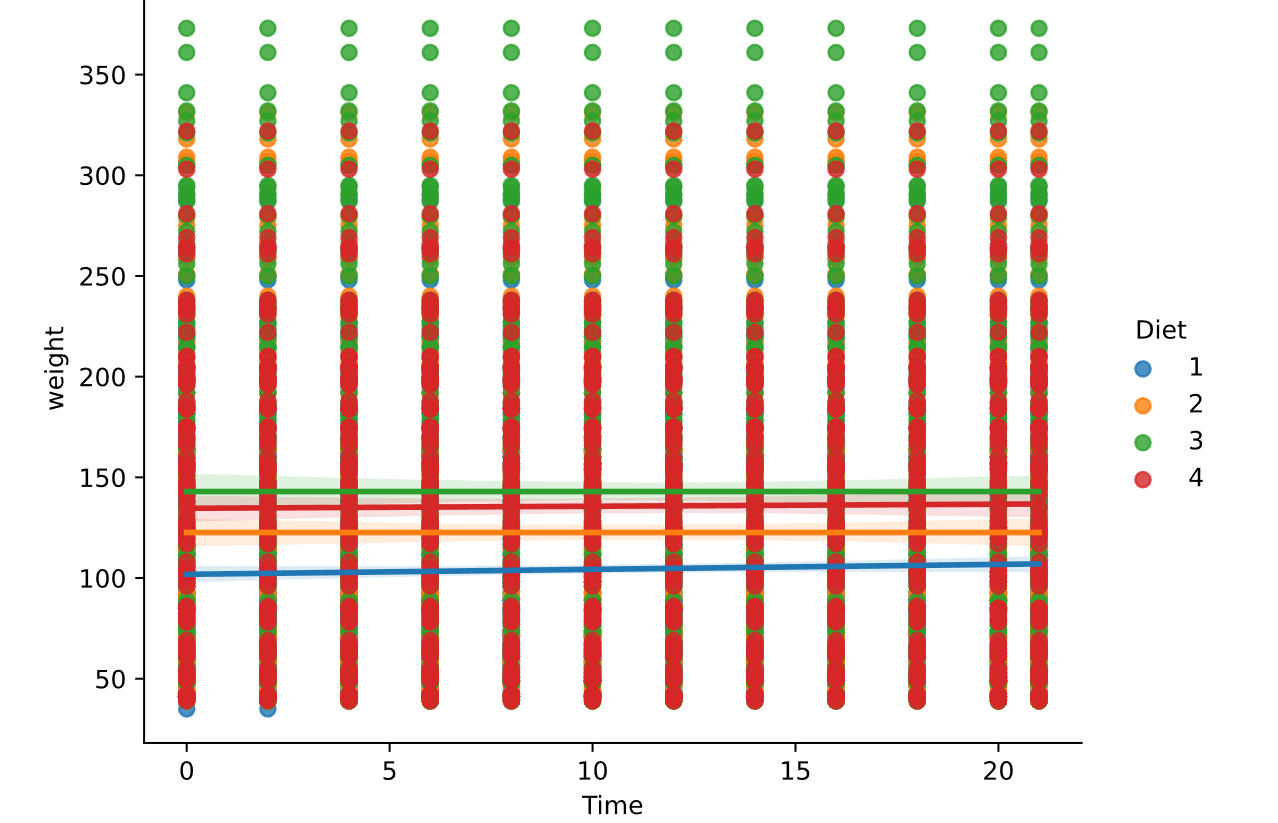